In [1]:
#Load the data to a dataframe
concrete_df = pd.read_csv("concrete (1).csv")

In [2]:
concrete_df.shape

(1030, 9)

In [3]:
#Features and types in the dataframe
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
#Range of values and general metrics 
concrete_df.describe().transpose()    

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


No Null in any field, meaning there are no missing values.

# Univariate Analysis

In [5]:
sns.distplot(concrete_df['cement'])

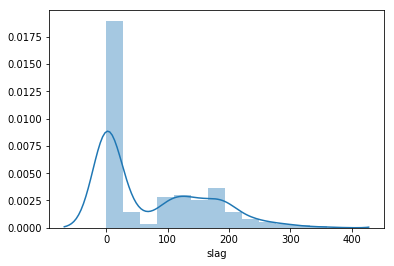

In [6]:
sns.distplot(concrete_df['slag'])

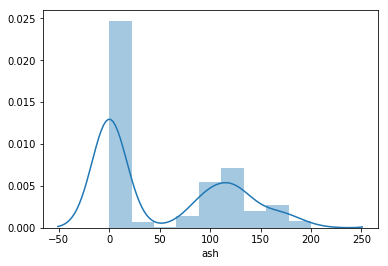

In [7]:
sns.distplot(concrete_df['ash'])

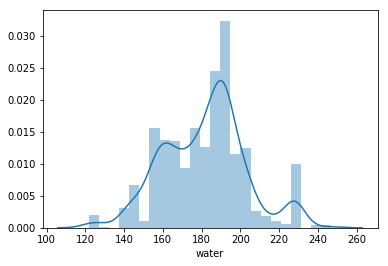

In [8]:
sns.distplot(concrete_df['water'])

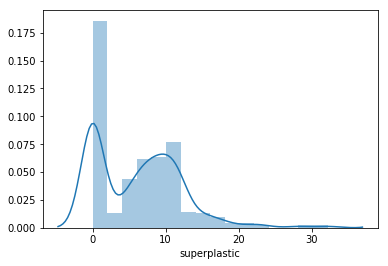

In [9]:
sns.distplot(concrete_df['superplastic'])

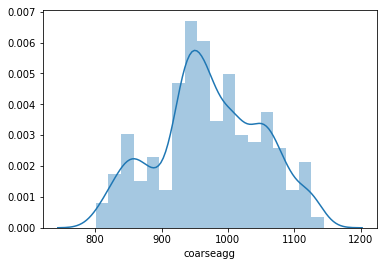

In [10]:
sns.distplot(concrete_df['coarseagg'])

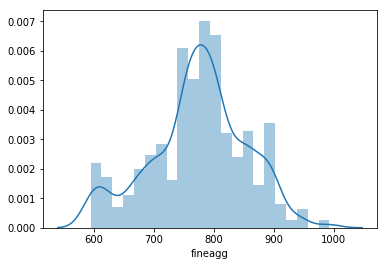

In [11]:
sns.distplot(concrete_df['fineagg'])

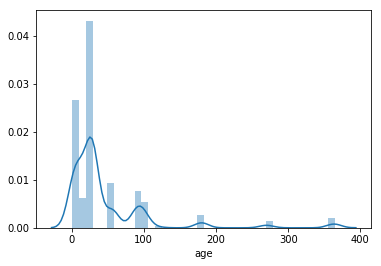

In [12]:
sns.distplot(concrete_df['age'])

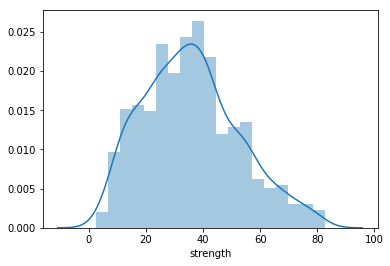

In [13]:
sns.distplot(concrete_df['strength'])

# Treating outliers

In [14]:
for feature in concrete_df.columns: # Loop through all columns in the dataframe
    q75, q25 = np.percentile(concrete_df[feature], [75 ,25])
    iqr = q75 - q25
 
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    #Replacing values less than min with min and greater than max with max.
    concrete_df.loc[concrete_df[feature] < min, feature] = min
    concrete_df.loc[concrete_df[feature] > max, feature] = max



# Bivariate Analysis

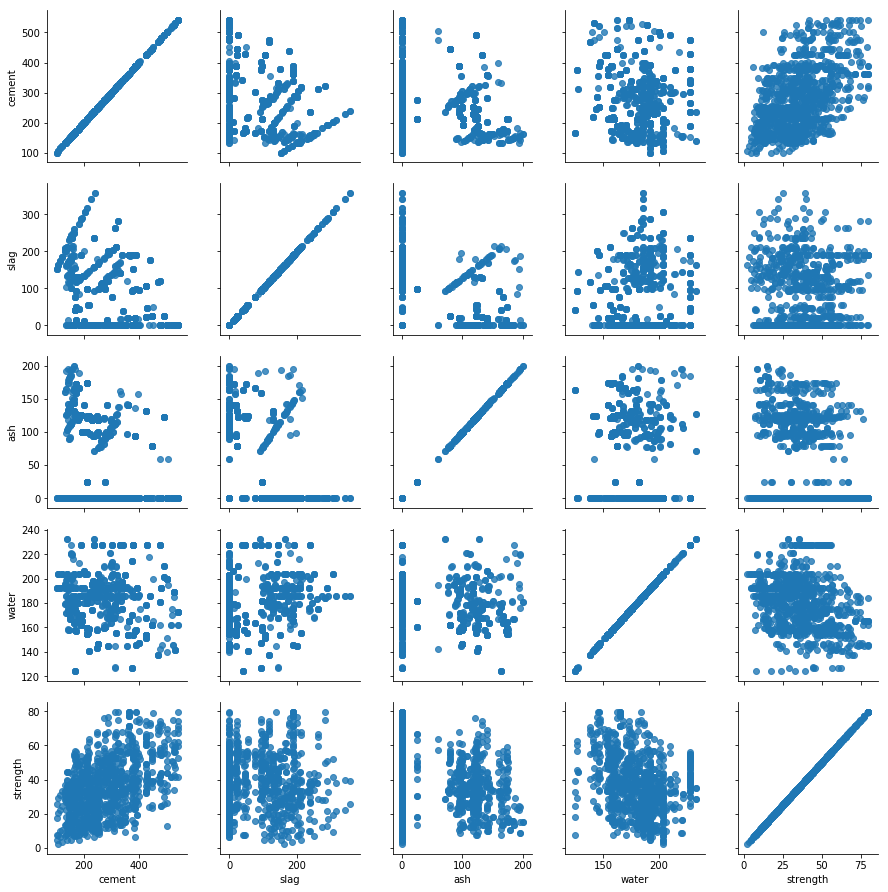

In [15]:
g = sns.PairGrid(concrete_df, vars=['cement', 'slag','ash','water', 'strength'])
g.map(plt.scatter, alpha=0.8)


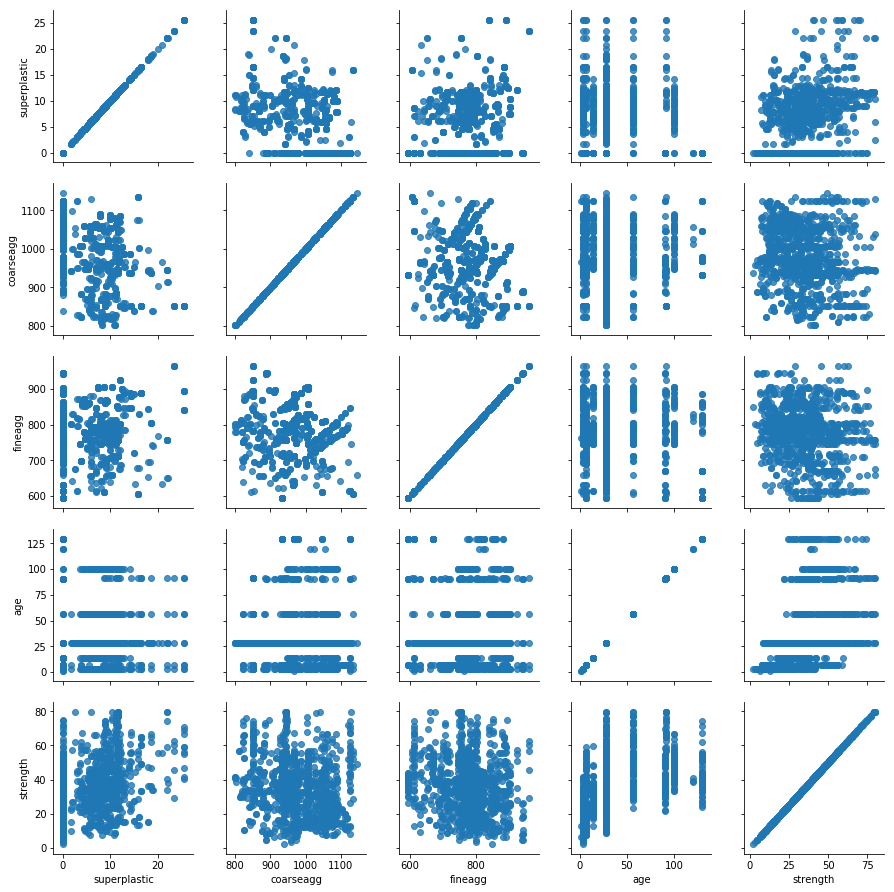

In [16]:
g = sns.PairGrid(concrete_df, vars=['superplastic', 'coarseagg','fineagg','age','strength'])
g.map(plt.scatter, alpha=0.8)

No clustering observed.

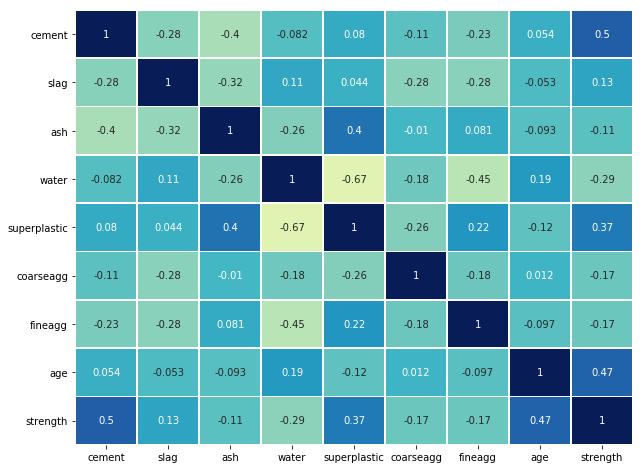

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(concrete_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

No strong correlation is observed.

In [18]:
df = concrete_df
#Applying zscore on the data to scale - since they are not normally distributed.
from scipy.stats import zscore
scaled_df = df.apply(zscore)

In [19]:
X = scaled_df.drop("strength", axis = 1)
y = scaled_df['strength']

#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [20]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.7345027291100398
0.6978992279311418


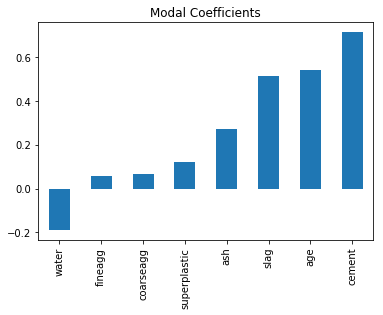

In [21]:
from pandas import Series

predictors = X_train.columns
coef = Series(regression_model.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [22]:
intercept = regression_model.intercept_

print(intercept)

0.01041907524396581


In [23]:
import statsmodels.api as sm
lm1 = sm.OLS(y_train, X_train).fit()
lm1.params


cement          0.712670
slag            0.513549
ash             0.271930
water          -0.189276
superplastic    0.121368
coarseagg       0.066754
fineagg         0.058376
age             0.540622
dtype: float64

In [24]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     282.2
Date:                Sat, 19 Oct 2019   Prob (F-statistic):          4.70e-229
Time:                        16:38:44   Log-Likelihood:                -626.35
No. Observations:                 824   AIC:                             1269.
Df Residuals:                     816   BIC:                             1306.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cement           0.7127      0.049     14.579   

The p-values of coarseagg and fineagg are greater than 0.005. 
So these features are statistically insignificant and can be dropped from model.


In [25]:
X_train_dropped = X_train.drop(["coarseagg","fineagg"], axis = 1)
X_test_dropped = X_test.drop(["coarseagg","fineagg"], axis = 1)

In [26]:
regression_model.fit(X_train_dropped, y_train)

print(regression_model.score(X_train_dropped, y_train))
print(regression_model.score(X_test_dropped, y_test))

0.7335820178741782
0.7007180502839941


Test and train scores are closer now, after dropping insignificant features

In [27]:
#Trying polynomial features 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_dropped)
X_test_poly = poly.fit_transform(X_test_dropped)

regression_model.fit(X_train_poly, y_train)
regression_model.fit(X_test_poly, y_test)

print(regression_model.score(X_train_poly, y_train))
print(regression_model.score(X_test_poly, y_test))

0.7367936467166964
0.8137873331674386


In [28]:
#Trying DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=6, max_depth=5)
regressor.fit(X_train_dropped , y_train)

y_pred = regressor.predict(X_test_dropped)

print(regressor.score(X_train_dropped, y_train))
print(regressor.score(X_test_dropped, y_test))

0.8120366843799184
0.7522217257165742


In [29]:
#Trying RandomForest
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 6)
rf_regressor = rf_regressor.fit(X_train_dropped, y_train)

y_pred = rf_regressor.predict(X_test_dropped)

print(rf_regressor.score(X_train_dropped, y_train))
print(rf_regressor.score(X_test_dropped, y_test))

0.9739775735826147
0.898939045942896


In [30]:
#Trying SVR 
from sklearn.svm import SVR
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X_train_dropped, y_train)
y_pred = clf.predict(X_test_dropped)
print(clf.score(X_train_dropped, y_train))
print(clf.score(X_test_dropped, y_test))

0.8902473987350784
0.9042914297876528


# k-fold cross validation 
To verify which is a better model.

In [31]:
from sklearn import model_selection
seed = 9
kfold = model_selection.KFold(n_splits=20)
X = scaled_df.drop(["coarseagg","fineagg","strength"], axis = 1)
y = scaled_df['strength']
results = model_selection.cross_val_score(regression_model, X, y, scoring='neg_mean_squared_error', cv=kfold)
print( results.mean(), results.std())

-0.2752990903941216 0.06912615184251733


In [32]:
results = model_selection.cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=kfold)
print( results.mean(), results.std())

-0.23351271760596437 0.054354444556711595


In [33]:
results = model_selection.cross_val_score(rf_regressor, X, y, scoring='neg_mean_squared_error', cv=kfold)
print( results.mean(), results.std())

-0.0950018760551791 0.031305382028232645


In [34]:
results = model_selection.cross_val_score(clf, X, y, scoring='neg_mean_squared_error', cv=kfold)
print( results.mean(), results.std())

-0.12574584896989385 0.03667065560735553


Random Forert and SVR seems to be better models based on the low standard deviation and higher mean.

# Parameter tuning for Randomforest

In [35]:
rf_params = { 
            "n_estimators"      : [5,10,20],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8,10],
            "bootstrap": [True, False],
            }

In [36]:
gsv_rf =  sklearn.model_selection.GridSearchCV(rf_regressor, rf_params, scoring='neg_mean_squared_error', cv=5) 
gsv_rf.fit(X_train_dropped, y_train)
print("Best parameters set found on training set:")
print("------------------------------------------")
print(gsv_rf.best_params_)
print()
print("Score of best estimator:")
print("------------------------")
gsv_rf_best =  gsv_rf.best_estimator_
print(gsv_rf_best.score(X_test_dropped,y_test))

Best parameters set found on training set:
------------------------------------------
{'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 20}

Score of best estimator:
------------------------
0.9108890249293192


# Parameter tuning for SVR

In [37]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': ['auto','scale'], 'C': [0.1, 0.2,0.3,0.4,0.5], 'epsilon':[0.1,0.2,0.3,0.4] },
                    {'kernel': ['linear'], 'gamma': ['auto', 'scale'] ,'C': [0.1, 0.2,0.3,0.4,0.5], 'epsilon':[0.1,0.2,0.3,0.4]}]

gsv = sklearn.model_selection.GridSearchCV(sklearn.svm.SVR(),tuned_parameters, cv=5, return_train_score=True, scoring='neg_mean_squared_error')
gsv.fit(X_train_dropped, y_train)

print("Best parameters set found on training set:")
print("------------------------------------------")
print(gsv.best_params_)
print()
print("Score of best estimator:")
print("------------------------")
gsv_best =  gsv.best_estimator_
print(gsv_best.score(X_test_dropped,y_test))

 

Best parameters set found on training set:
------------------------------------------
{'C': 0.5, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'}

Score of best estimator:
------------------------
0.8876959886394898


Best score is acheived in Randomforest parameter tuning.

# 95 % Confidence interval range for the model performance

In [38]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

data = scaled_df.drop(["coarseagg","fineagg"], axis = 1)
values = data.values


In [39]:
n_iterations = 1000
n_size = int(len(data)*0.8)
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)
	test = np.array([x for x in values if x.tolist() not in train.tolist()])
	# fit the best model
	gsv_rf_best.fit(train[:,:-1], train[:,-1])
	# evaluate model
	score = gsv_rf_best.score(test[:,:-1], test[:,-1])
	stats.append(score)

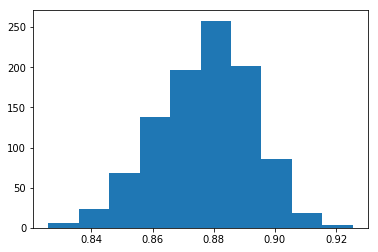

95.0 confidence interval 84.5% and 90.5%


In [40]:

# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95

p = ((1.0-alpha)/2.0) * 100
lower = np.percentile(stats, p)

p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(stats, p)

print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))